In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import torch
import torch.nn as nn
import torch.optim as optim

# Load the Boston Housing dataset

In [2]:
raw_df = pd.read_csv("housing.csv", sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/_w/jrmvt1q928b86gt4h4lj1f100000gp/T/ipykernel_15827/1391170411.py:1: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv("housing.csv", sep="\s+", skiprows=22, header=None)


# Split the data into training and testing sets

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features

In [5]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# MLP model with pytorch

## Define model

In [13]:
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(X_train_tensor.shape[1], 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

## Initialize the model, define loss function and optimizer

In [14]:
mlp_model = MLPModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.005)


## Train the MLP model

In [15]:
num_epochs = 1000
for epoch in range(num_epochs):
    mlp_model.train()
    optimizer.zero_grad()
    outputs = mlp_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [50/1000], Loss: 7.9452
Epoch [100/1000], Loss: 3.6812
Epoch [150/1000], Loss: 2.8962
Epoch [200/1000], Loss: 2.4411
Epoch [250/1000], Loss: 2.1315
Epoch [300/1000], Loss: 1.7253
Epoch [350/1000], Loss: 1.3949
Epoch [400/1000], Loss: 1.1054
Epoch [450/1000], Loss: 0.8182
Epoch [500/1000], Loss: 0.5486
Epoch [550/1000], Loss: 0.3038
Epoch [600/1000], Loss: 0.1645
Epoch [650/1000], Loss: 0.1037
Epoch [700/1000], Loss: 0.0736
Epoch [750/1000], Loss: 0.0563
Epoch [800/1000], Loss: 0.0425
Epoch [850/1000], Loss: 0.0298
Epoch [900/1000], Loss: 0.0239
Epoch [950/1000], Loss: 0.0192
Epoch [1000/1000], Loss: 0.0157


## Evaluate the MLP model

In [16]:
mlp_model.eval()
with torch.no_grad():
    y_pred_mlp = mlp_model(X_test_tensor).numpy()
    mlp_mse = mean_squared_error(y_test, y_pred_mlp)
    mlp_r2 = r2_score(y_test, y_pred_mlp)


# Linear Regression model

In [17]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

# Decision Tree Regressor

In [19]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

# Random Forest Regressor

In [21]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Compare results

In [22]:
results = pd.DataFrame({
    'Model': ['MLP', 'Linear Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [mlp_mse, lr_mse, dt_mse, rf_mse],
    'R-squared': [mlp_r2, lr_r2, dt_r2, rf_r2]
})

## Compare MSE

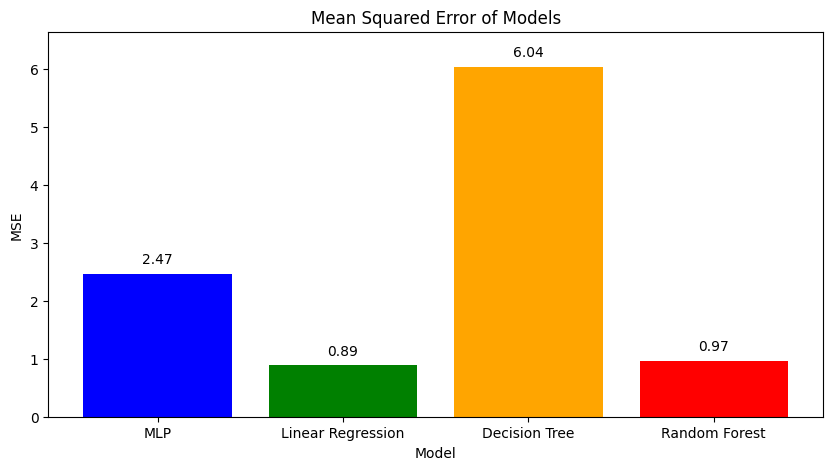

In [26]:
plt.figure(figsize=(10, 5))
plt.bar(results['Model'], results['MSE'], color=['blue', 'green', 'orange', 'red'])
for i, mse in enumerate(results['MSE']):
    plt.text(i, mse + max(results['MSE']) * 0.02, f"{mse:.2f}", ha='center', va='bottom')
plt.title('Mean Squared Error of Models')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.ylim(0, max(results['MSE']) * 1.1)
plt.show()

# Compare R-squared 

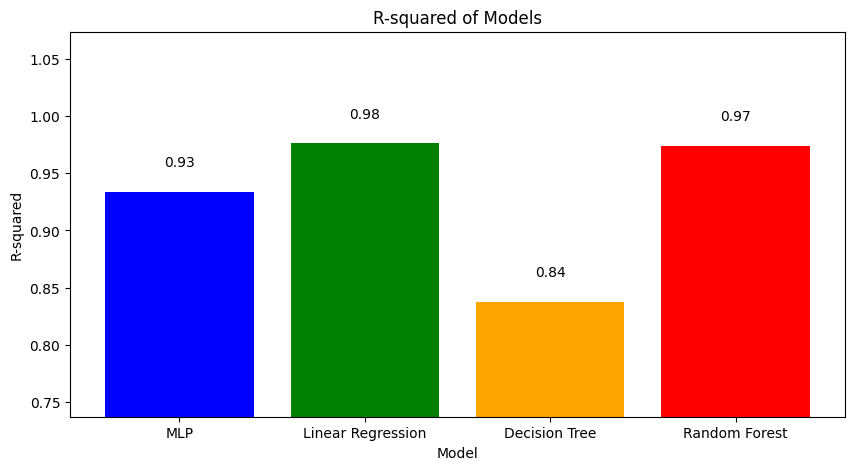

In [27]:
plt.figure(figsize=(10, 5))
plt.bar(results['Model'], results['R-squared'], color=['blue', 'green', 'orange', 'red'])
for i, r2 in enumerate(results['R-squared']):
    plt.text(i, r2 + max(results['R-squared']) * 0.02, f"{r2:.2f}", ha='center', va='bottom')
plt.title('R-squared of Models')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.ylim(min(results['R-squared']) - 0.1, max(results['R-squared']) * 1.1)
plt.show()

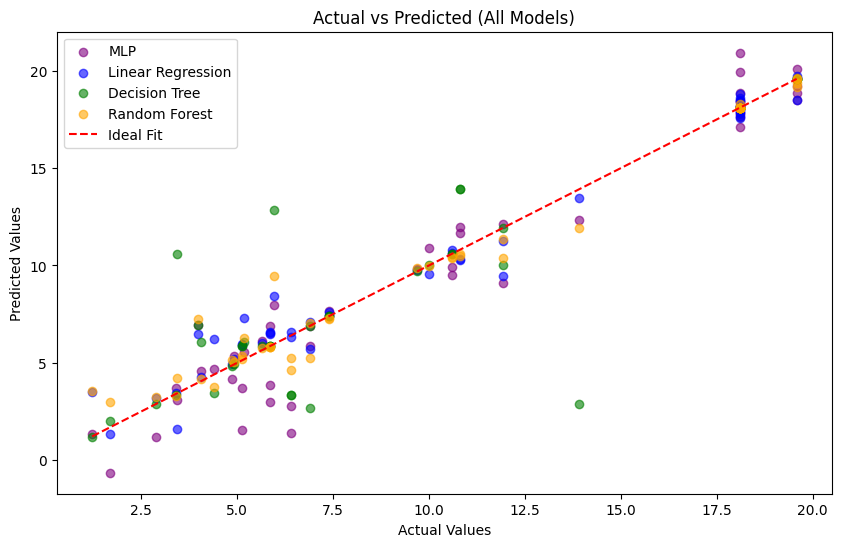

In [30]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted_MLP': y_pred_mlp.flatten(),
    'Predicted_LR': y_pred_lr,
    'Predicted_DT': y_pred_dt,
    'Predicted_RF': y_pred_rf
})

# Visualize Predicted vs Actual for All Models
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted_MLP'], alpha=0.6, label='MLP', color='purple')
plt.scatter(comparison_df['Actual'], comparison_df['Predicted_LR'], alpha=0.6, label='Linear Regression', color='blue')
plt.scatter(comparison_df['Actual'], comparison_df['Predicted_DT'], alpha=0.6, label='Decision Tree', color='green')
plt.scatter(comparison_df['Actual'], comparison_df['Predicted_RF'], alpha=0.6, label='Random Forest', color='orange')
plt.title('Actual vs Predicted (All Models)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.legend()
plt.show()